In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
pd.options.mode.chained_assignment = None

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [9]:
print ("Shape Of The Before Outliers:",train.shape)
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]
print ("Shape Of The After Outliers:",train.shape)

Shape Of The Before Outliers: (10886, 12)
Shape Of The After Outliers: (10739, 12)


In [26]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [11]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday)
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

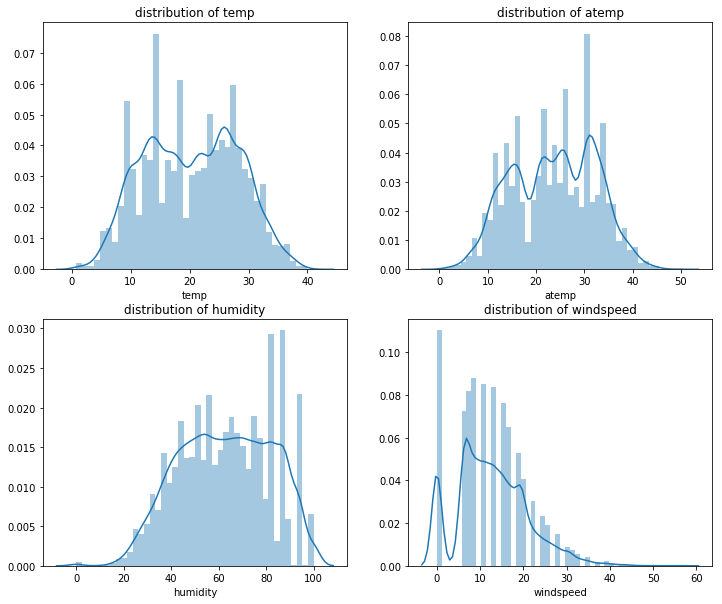

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sb.distplot(data["temp"],ax=axes[0][0])
sb.distplot(data["atemp"],ax=axes[0][1])
sb.distplot(data["humidity"],ax=axes[1][0])
sb.distplot(data["windspeed"],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title='distribution of temp')
axes[0][1].set(xlabel='atemp',title='distribution of atemp')
axes[1][0].set(xlabel='humidity',title='distribution of humidity')
axes[1][1].set(xlabel='windspeed',title='distribution of windspeed')

In [13]:
dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0["windspeed"])

wind0value = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0.loc[:,"windspeed"] = wind0value
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

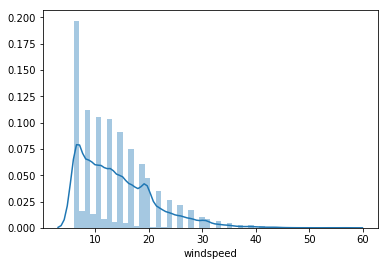

In [14]:
sb.distplot(data["windspeed"])

In [15]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimemodel = dataTest["datetime"]
ylabels = dataTrain["count"]
ylabelsLog = np.log(ylabels)

In [16]:
dropFeatures = ['casual',"count","datetime","date","registered","weekday"]
dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

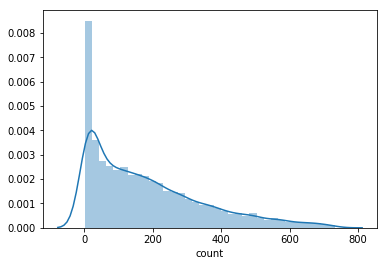

In [17]:
sb.distplot(ylabels)

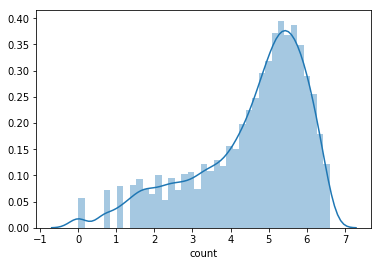

In [18]:
sb.distplot(ylabelsLog)

In [19]:
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)

In [20]:
ylabelsLog = np.log(ylabels)
rfModel.fit(dataTrain,ylabelsLog)
preds = rfModel.predict(X= dataTrain)

In [21]:
predsTest = rfModel.predict(X= dataTest)

In [22]:
predsTest

array([2.15844429, 1.44694328, 0.91291514, ..., 4.94290691, 4.75335254,
       4.15582986])

In [23]:
predsTest = rfModel.predict(X= dataTest)
submission = pd.DataFrame({
    "datetime":datetimemodel,
    "count":[max(0,x) for x in np.exp(predsTest)]
})

#### Save as file : submission.to_csv('bike_predictions.csv',index=False)

In [24]:
submission

,datetime,count
9442,2011-01-20 00:00:00,8.657658
16365,2011-01-20 01:00:00,4.250103
16366,2011-01-20 02:00:00,2.491575
9443,2011-01-20 03:00:00,3.018362
9444,2011-01-20 04:00:00,2.506770
9445,2011-01-20 05:00:00,5.514766
9446,2011-01-20 06:00:00,35.135707
9447,2011-01-20 07:00:00,91.354368
9448,2011-01-20 08:00:00,205.294373
9449,2011-01-20 09:00:00,115.210910
